## Observations and Insights

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "/Users/ericamatrese/Desktop/pymaceuticals/Instructions/Pymaceuticals/data/Mouse_metadata.csv"
study_results = "/Users/ericamatrese/Desktop/pymaceuticals/Instructions/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
final_study_results = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

## Summary statistics

In [3]:
final_study_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_vol_table = final_study_results.groupby("Drug Regimen")

#mean
tumor_mean = tumor_vol_table["Tumor Volume (mm3)"].mean()
tumor_mean.head()

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Name: Tumor Volume (mm3), dtype: float64

In [5]:
#median
tumor_median = tumor_vol_table["Tumor Volume (mm3)"].median()
tumor_median.head()

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Name: Tumor Volume (mm3), dtype: float64

In [6]:
#variance
tumor_variance = tumor_vol_table["Tumor Volume (mm3)"].var()
tumor_variance.head()

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Name: Tumor Volume (mm3), dtype: float64

In [7]:
#Standard Deviation
tumor_standard_deviation = tumor_vol_table["Tumor Volume (mm3)"].std()
tumor_standard_deviation.head()

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Name: Tumor Volume (mm3), dtype: float64

In [8]:
tumor_SEM = tumor_vol_table["Tumor Volume (mm3)"].sem()
tumor_SEM.head()

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Name: Tumor Volume (mm3), dtype: float64

In [9]:
tumor_df = pd.DataFrame({"Mean": tumor_mean,
                                 "Median": tumor_median,
                                 "Variance": tumor_variance,
                                  "Standard Deviation": tumor_standard_deviation,
                                   "SEM": tumor_SEM})
tumor_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [10]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
tumor_count = tumor_vol_table["Tumor Volume (mm3)"].nunique()
tumor_count

Drug Regimen
Capomulin    206
Ceftamin     154
Infubinol    154
Ketapril     164
Naftisol     162
Placebo      157
Propriva     136
Ramicane     204
Stelasyn     158
Zoniferol    158
Name: Tumor Volume (mm3), dtype: int64

Text(0, 0.5, 'Data Points')

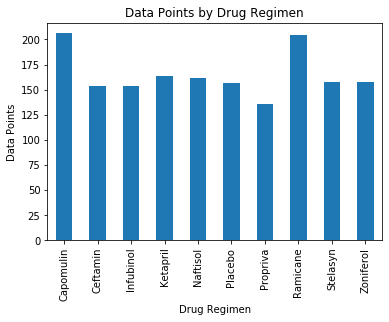

In [11]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
tumor_count.plot(kind="bar")

plt.title("Data Points by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

## Pie plots

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender = final_study_results["Sex"].value_counts()
mice_gender.head()

Male      958
Female    935
Name: Sex, dtype: int64

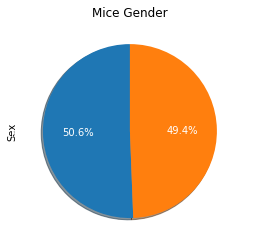

In [34]:
mice_gender.plot(kind= "pie", autopct='%1.1f%%',shadow=True, textprops={'color':"w"},title= "Mice Gender",startangle=90)

([<matplotlib.patches.Wedge at 0x1a1aa258d0>,
 [Text(-1.0997996703027118, -0.020992503472585362, 'Male'),
  Text(1.0997996703027118, 0.020992503472585713, 'Female')],
 [Text(-0.5998907292560246, -0.011450456439592015, '50.6%'),
  Text(0.5998907292560246, 0.011450456439592206, '49.4%')])

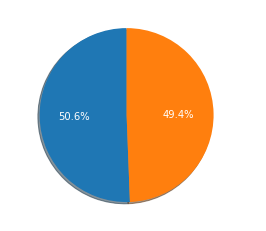

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male","Female"]
sizes = [958,935]

plt.pie(sizes, labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=90,textprops={'color':"w"})

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
promising_treatments=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen